In [1]:
import lhapdf
#import ROOT
import math
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams['text.usetex'] = True
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq18 = lhapdf.mkPDF("CT18qed",0)
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)
#JAM21_PDF = lhapdf.mkPDF("JAM21PionPDFnlo", 0)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/CT18qed/CT18qed_0000.dat
CT18qed PDF set, member #0, version 1
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


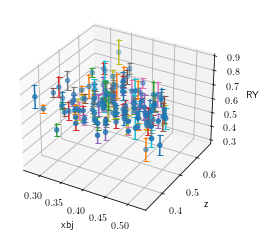

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
df = pd.read_csv("results/csv.csv")
xs = df[df['Q2']==4]['xbj_corr']
zs = df[df['Q2']==4]['z_corr']
RYs = df[df['Q2']==4]['RY']
RY_err = df[df['Q2']==4]['error']
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for i in range(0,len(xs)):
    xbj_corr = xs[i]
    z_corr = zs[i]
    RY = RYs[i]
    RY_error = RY_err[i]
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_")
ax.scatter(xs,zs,RYs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RY")
plt.show()
#plt.savefig("RY_xbj_z")

In [3]:
df.describe()

,Q2,Q2_corr,Q2_corr_err,xbj,xbj_corr,xbj_corr_err,z,z_corr,z_corr_err,RunGroup,...,yield_neg_incnorad,yield_neg_incrad,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,...,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,373.000000,373.000000,387.000000,387.000000
mean,4.697674,4.374907,0.012825,0.448514,0.448760,0.000082,0.462726,0.463463,0.000075,305.478036,...,10.648208,9.479349,16.873481,15.267469,6.296240,3.637854,0.426610,0.443898,2.414620,2.610889
std,0.595216,0.708220,0.007137,0.074823,0.070167,0.000025,0.069774,0.066185,0.000031,142.060946,...,10.693538,9.660740,16.673942,15.310029,0.983591,0.685459,0.062460,0.064213,0.387254,9.770223
min,4.000000,3.072320,0.001459,0.275000,0.278487,0.000014,0.325000,0.333986,0.000003,90.000000,...,0.203569,0.181304,0.317505,0.286971,4.369330,2.842170,0.273047,0.320308,1.569590,-9.225080
25%,4.000000,3.846530,0.007259,0.375000,0.389602,0.000072,0.425000,0.423211,0.000050,180.000000,...,3.146945,2.698215,5.007215,4.341065,5.555060,3.068795,0.377052,0.405853,2.128520,-6.211820
50%,4.750000,4.424060,0.012191,0.425000,0.440770,0.000094,0.475000,0.471058,0.000089,290.000000,...,6.637630,5.900650,10.628600,9.706990,6.209230,3.472530,0.416600,0.450148,2.457350,-0.380967
75%,5.500000,4.886100,0.017653,0.525000,0.514415,0.000100,0.525000,0.518679,0.000100,440.000000,...,14.542900,12.845700,22.985300,20.880750,6.878250,4.042780,0.461149,0.496379,2.716350,10.869900
max,5.500000,6.060700,0.031787,0.625000,0.612865,0.000111,0.675000,0.659579,0.000108,550.000000,...,55.368600,52.285000,83.349500,81.021600,9.623580,6.521520,0.545935,0.640100,3.402800,23.379000


In [4]:
pdf_sets = []
i_FF = 2
FF_model = ["fDSSLO","fDSSNLO","JAM20","hknsff07_LO","hknsff07_NLO"]
i_PDF = 1
PDF_model = ["cteq6l1","JAM20","cteq18qed"]
i_assumption = '7ass_rho'
RY_str = 'RY'
#RY_str = 'RY_rho'
#RY_str = 'RY_1.8rho'
#I am using JAM20PDF

In [5]:
inits = (0.31621375387783907,1.1655536623222454,1,4,-0.5,0.25)

In [6]:
def Get_weighted(values,errs):
    sums = 0
    sig = 0
    for i in range(len(values)):
        for j in range(len(errs)):
            sums+=values[i]/(errs[i]*errs[i])
            sig+=1/(errs[i]*errs[i])
    return sums/sig   
def Get_weighted_average(value,error):
    sum_mean = 0
    sum_sigma = 0
    for i in range(len(value)):
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma
def Get_weighted_sigma(value,error):
    sum_sigma = 0
    for i in range(len(value)):
        sum_sigma += 1/(error[i]*error[i])
    return math.sqrt(1/sum_sigma)




In [7]:
from iminuit import Minuit
import scipy.integrate as integrate
import scipy.special as sc
import sys
sys.path.insert(1,'DSS')
import fDSS_
sys.path.insert(1,'hkns07fflib-v1_2')
import hknsff07_
def Deltaz_param(z_had,alpha,beta):
    delta_z = z_had**alpha*(1-z_had)**beta
    return delta_z
def dux_param(xbj,k,a,b):
    #a = -0.5 
    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
    duxx = k*(1-xbj)**a*xbj**b*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return duxx
    #return params[len(params)-1]

In [8]:
def Y_CSV(Q,z_had,xbj,alpha,beta,k,a,b,a_CSV):
    Deltaz = Deltaz_param(z_had,alpha,beta)
    dux = dux_param(xbj,k,a,b)
    u = JAM20_PDF.xfxQ(2,xbj,Q)
    ub = JAM20_PDF.xfxQ(-2,xbj,Q)
    d = JAM20_PDF.xfxQ(1,xbj,Q)
    db = JAM20_PDF.xfxQ(-1,xbj,Q)
    T = (ub+db)/(u+d)
    strange = JAM20_PDF.xfxQ(3,xbj,Q)
    sb = JAM20_PDF.xfxQ(-3,xbj,Q)
    S = 2*(strange+sb)/(u+d)
    Y_num = (4+S+T)*Deltaz+(4*T+1)+(4*a_CSV*Deltaz-1)*dux
    Y_den = (4*T+1+S)*Deltaz+(4+T)+(4*a_CSV-Deltaz)*dux
    return Y_num/Y_den

In [9]:
df = df[df['shms_dp']>-9.5]
df = df[df['shms_dp']<24.5]
df.describe()

,Q2,Q2_corr,Q2_corr_err,xbj,xbj_corr,xbj_corr_err,z,z_corr,z_corr_err,RunGroup,...,yield_neg_incnorad,yield_neg_incrad,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,...,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,373.000000,373.000000,387.000000,387.000000
mean,4.697674,4.374907,0.012825,0.448514,0.448760,0.000082,0.462726,0.463463,0.000075,305.478036,...,10.648208,9.479349,16.873481,15.267469,6.296240,3.637854,0.426610,0.443898,2.414620,2.610889
std,0.595216,0.708220,0.007137,0.074823,0.070167,0.000025,0.069774,0.066185,0.000031,142.060946,...,10.693538,9.660740,16.673942,15.310029,0.983591,0.685459,0.062460,0.064213,0.387254,9.770223
min,4.000000,3.072320,0.001459,0.275000,0.278487,0.000014,0.325000,0.333986,0.000003,90.000000,...,0.203569,0.181304,0.317505,0.286971,4.369330,2.842170,0.273047,0.320308,1.569590,-9.225080
25%,4.000000,3.846530,0.007259,0.375000,0.389602,0.000072,0.425000,0.423211,0.000050,180.000000,...,3.146945,2.698215,5.007215,4.341065,5.555060,3.068795,0.377052,0.405853,2.128520,-6.211820
50%,4.750000,4.424060,0.012191,0.425000,0.440770,0.000094,0.475000,0.471058,0.000089,290.000000,...,6.637630,5.900650,10.628600,9.706990,6.209230,3.472530,0.416600,0.450148,2.457350,-0.380967
75%,5.500000,4.886100,0.017653,0.525000,0.514415,0.000100,0.525000,0.518679,0.000100,440.000000,...,14.542900,12.845700,22.985300,20.880750,6.878250,4.042780,0.461149,0.496379,2.716350,10.869900
max,5.500000,6.060700,0.031787,0.625000,0.612865,0.000111,0.675000,0.659579,0.000108,550.000000,...,55.368600,52.285000,83.349500,81.021600,9.623580,6.521520,0.545935,0.640100,3.402800,23.379000


In [10]:
Qs = []
parameters = []
param_errs = []
kaisquare = []

def least_squares_Q2(alpha,beta,k,a,b,a_CSV):
    least_square = 0
    for i,row in df.iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RY = row[RY_str]
        RY_err = row['error']
        Qcorr = math.sqrt(Q2corr)
        least_square+=((RY-Y_CSV(Qcorr,zhad,xbj,alpha,beta,k,a,b,a_CSV)))**2/(RY_err)**2
    return least_square
m_Q2 = Minuit(least_squares_Q2,alpha = inits[0],beta = inits[1],k = inits[2],a = inits[3],b = inits[4],a_CSV = inits[5])
#m_Q2.limits['gamma'] = (-1.2, -0.8)
m_Q2.limits['alpha'] = (0,0.5)
m_Q2.limits['beta'] = (1,1.2)
#m_Q2.fixed['alpha'] = True
#m_Q2.fixed['beta'] = True
m_Q2.fixed['a_CSV'] = True
m_Q2.fixed['a'] = True
m_Q2.fixed['b'] = True
#m_Q2.limits['a'] = (0,5)
#m_Q2.limits['b'] = (-0.5,0)
m_Q2.errordef = Minuit.LEAST_SQUARES
m_Q2.migrad()
m_Q2.hesse()
print(*m_Q2.values)
#print(m_Q2.values["a"])
params = m_Q2.values
parameters.append(m_Q2.values)
param_errs.append(m_Q2.errors)
#print(m_Q2.values["a"])
print(len(df)) 
#print(m_Q2.values)
#print(m_Q2.errors)
print(m_Q2.fval)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(df) - m_Q2.nfit}",
]
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
print(fit_info)

dfrhoallout = pd.DataFrame()
for i,row in df.iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    RY = row[RY_str]
    RY_err = row['error']
    Qcorr = math.sqrt(Q2corr)
    residual = (RY-Y_CSV(Qcorr,zhad,xbj,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],m_Q2.values[4],m_Q2.values[5]))/RY_err
    
    row['Residual_a_CSV']=(residual)
    dfrhoallout = dfrhoallout.append(row)


dfrhoallout.to_csv('results/csv_newY_out.csv',index = False)




0.28319051431746367 1.0000000000061917 -1.8771383627557117 4.0 -0.5 0.25
387
805.3636977230046
['$\\chi^2$ / $n_\\mathrm{dof}$ = 805.4 / 384', 'alpha = $0.283 \\pm 0.016$', 'beta = $1.000 \\pm 0.003$', 'k = $-1.877 \\pm 0.343$', 'a = $4.000 \\pm 0.040$', 'b = $-0.500 \\pm -0.005$', 'a_CSV = $0.250 \\pm 0.003$']


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrh

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrh

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrh

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrh

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/526325831.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrh

In [11]:
print(m_Q2.covariance)
print(m_Q2.values)

┌───────┬─────────────────────────────────────────────────────────────┐
│       │     alpha      beta         k         a         b     a_CSV │
├───────┼─────────────────────────────────────────────────────────────┤
│ alpha │  0.000257 -7.48e-13  -0.00488         0         0         0 │
│  beta │ -7.48e-13   6.7e-14 -1.59e-11         0         0         0 │
│     k │  -0.00488 -1.59e-11     0.117         0         0         0 │
│     a │         0         0         0         0         0         0 │
│     b │         0         0         0         0         0         0 │
│ a_CSV │         0         0         0         0         0         0 │
└───────┴─────────────────────────────────────────────────────────────┘
<ValueView alpha=0.28319051431746367 beta=1.0000000000061917 k=-1.8771383627557117 a=4.0 b=-0.5 a_CSV=0.25>


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/4195917487.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs_ones_center = df[df['Q2']==4][df['xbj']==xi].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/4195917487.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==4][df['xbj']==xi][df['z']==zi].iterrows():


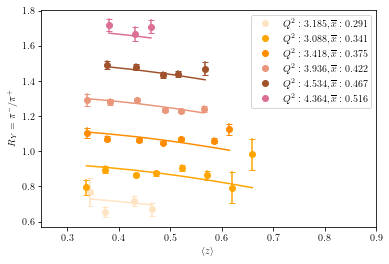

In [12]:
i_color = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
xbj_ones_center = df[df['Q2']==4]['xbj'].unique()
RY_offset = 0
for xi in xbj_ones_center:
    #print(xi)
    
    z_corrs = []
    RY_alls = []
    xbj_corr_xbj = []
    xbj_err_xbj = []
    Q2_corr_xbj = []
    Q2_err_xbj = []
    zs_ones_center = df[df['Q2']==4][df['xbj']==xi].sort_values('z')['z'].unique()
    for zi in zs_ones_center:
        #print(zi)
        #print(xi,zi)
        RYs = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        for i,row in df[df['Q2']==4][df['xbj']==xi][df['z']==zi].iterrows():
            zi_corr = float(row['z_corr'])
            zi_corr_err = float(row['z_corr_err'])
            xbji_corr = float(row['xbj_corr'])
            xbji_corr_err = float(row['xbj_corr_err'])
            #xbjs_corr.append(xbji_corr)
            #xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = float(row['Q2_corr'])
            Q2i_corr_err = float(row['Q2_corr_err'])
            #z_hadron = float(key_z)
            
        #for key_RunGroup,RunGroup_value in z_value.items():
            
            RunGroup = float(row['RunGroup'])
            RYi=float(row[RY_str])+RY_offset
            RYi_error = float(row['error'])
            RYs.append(RYi)
            RYs_error.append(RYi_error)
            zs_corr.append(zi_corr)
            zs_corr_err.append(zi_corr_err)
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
        Q2_corr_z = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        Q2_err_z = Get_weighted_sigma(Q2s_corr,Q2s_corr_err)
        Q2_corr_xbj.append(Q2_corr_z)
        Q2_err_xbj.append(Q2_err_z)
        xbj_corr_z = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_corr_err_z = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        xbj_corr_xbj.append(xbj_corr_z)
        xbj_err_xbj.append(xbj_corr_err_z)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs,RYs_error)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_corrs.append(xbj_corr)
        z_corrs.append(z_corr)
        RY_alls.append(RY)
        plt.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],marker = "_",color = colors_all[i_color])
        Q2_corr = Get_weighted_average(Q2_corr_xbj,Q2_err_xbj)
    xbj_corr = Get_weighted_average(xbj_corr_xbj,xbj_err_xbj)
    plt.plot(z_corrs,RY_alls,"o",label = f"$Q^2:{Q2_corr:.3f},\overline{{x}} :{xbj_corr:.3f}$",color = colors_all[i_color])#Q2,r'$ x $',str(xbj_corr)[0:5]),color = colors_all[i_color])
    RYmeass = []
    for zhad in z_corrs:
        RY_fit = Y_CSV(math.sqrt(Q2_corr),zhad,xbj_corr,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],m_Q2.values[4],m_Q2.values[5])
        RYmeass.append(RY_fit+RY_offset)
    plt.plot(z_corrs,RYmeass,color = colors_all[i_color])
    RY_offset = RY_offset+0.2
    #r'$\langle B_{\mathrm{e}} \rangle$'
    
    #plt.title(Q2)
    i_color +=1
plt.xlabel(r'$\langle z \rangle$')
plt.ylabel(r'$R_Y=\pi^-/\pi^+$')
plt.xlim(0.25,0.9)
plt.legend()
#plt.ylim(0,10)
plt.savefig("results/RYxz_z_1st.png")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/3655603065.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs_ones_center = df[df['Q2']==4.75][df['xbj']==xi].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/3655603065.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==4.75][df['xbj']==xi][df['z']==zi].iterrows():


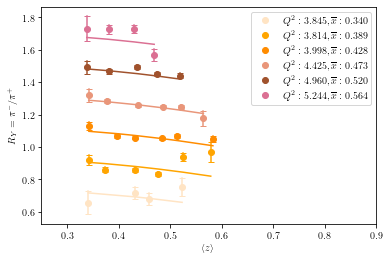

In [13]:
i_color = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
xbj_ones_center = df[df['Q2']==4.75]['xbj'].unique()
RY_offset = 0
for xi in xbj_ones_center:
    #print(xi)
    
    z_corrs = []
    RY_alls = []
    xbj_corr_xbj = []
    xbj_err_xbj = []
    Q2_corr_xbj = []
    Q2_err_xbj = []
    zs_ones_center = df[df['Q2']==4.75][df['xbj']==xi].sort_values('z')['z'].unique()
    for zi in zs_ones_center:
        #print(zi)
        #print(xi,zi)
        RYs = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        for i,row in df[df['Q2']==4.75][df['xbj']==xi][df['z']==zi].iterrows():
            zi_corr = float(row['z_corr'])
            zi_corr_err = float(row['z_corr_err'])
            xbji_corr = float(row['xbj_corr'])
            xbji_corr_err = float(row['xbj_corr_err'])
            #xbjs_corr.append(xbji_corr)
            #xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = float(row['Q2_corr'])
            Q2i_corr_err = float(row['Q2_corr_err'])
            #z_hadron = float(key_z)
            
        #for key_RunGroup,RunGroup_value in z_value.items():
            
            RunGroup = float(row['RunGroup'])
            RYi=float(row[RY_str])+RY_offset
            RYi_error = float(row['error'])
            RYs.append(RYi)
            RYs_error.append(RYi_error)
            zs_corr.append(zi_corr)
            zs_corr_err.append(zi_corr_err)
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
        Q2_corr_z = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        Q2_err_z = Get_weighted_sigma(Q2s_corr,Q2s_corr_err)
        Q2_corr_xbj.append(Q2_corr_z)
        Q2_err_xbj.append(Q2_err_z)
        xbj_corr_z = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_corr_err_z = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        xbj_corr_xbj.append(xbj_corr_z)
        xbj_err_xbj.append(xbj_corr_err_z)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs,RYs_error)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_corrs.append(xbj_corr)
        z_corrs.append(z_corr)
        RY_alls.append(RY)
        plt.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],marker = "_",color = colors_all[i_color])
        Q2_corr = Get_weighted_average(Q2_corr_xbj,Q2_err_xbj)
    xbj_corr = Get_weighted_average(xbj_corr_xbj,xbj_err_xbj)
    plt.plot(z_corrs,RY_alls,"o",label = f"$Q^2:{Q2_corr:.3f},\overline{{x}} :{xbj_corr:.3f}$",color = colors_all[i_color])#Q2,r'$ x $',str(xbj_corr)[0:5]),color = colors_all[i_color])
    RYmeass = []
    for zhad in z_corrs:
        RY_fit = Y_CSV(math.sqrt(Q2_corr),zhad,xbj_corr,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],m_Q2.values[4],m_Q2.values[5])
        RYmeass.append(RY_fit+RY_offset)
    plt.plot(z_corrs,RYmeass,color = colors_all[i_color])
    RY_offset = RY_offset+0.2
    #r'$\langle B_{\mathrm{e}} \rangle$'
    
    #plt.title(Q2)
    i_color +=1
plt.xlabel(r'$\langle z \rangle$')
plt.ylabel(r'$R_Y=\pi^-/\pi^+$')
plt.xlim(0.25,0.9)
plt.legend()
#plt.ylim(0,10)
plt.savefig("results/RYxz_z_2nd.png")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/1152855605.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs_ones_center = df[df['Q2']==5.5][df['xbj']==xi].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/1152855605.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==5.5][df['xbj']==xi][df['z']==zi].iterrows():


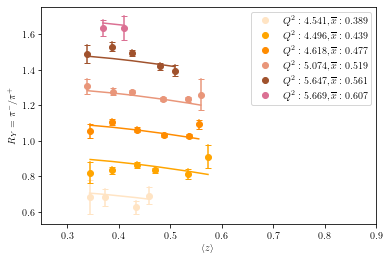

In [14]:
i_color = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
xbj_ones_center = df[df['Q2']==5.5]['xbj'].unique()
RY_offset = 0
for xi in xbj_ones_center:
    #print(xi)
    
    z_corrs = []
    RY_alls = []
    xbj_corr_xbj = []
    xbj_err_xbj = []
    Q2_corr_xbj = []
    Q2_err_xbj = []
    zs_ones_center = df[df['Q2']==5.5][df['xbj']==xi].sort_values('z')['z'].unique()
    for zi in zs_ones_center:
        #print(zi)
        #print(xi,zi)
        RYs = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        for i,row in df[df['Q2']==5.5][df['xbj']==xi][df['z']==zi].iterrows():
            zi_corr = float(row['z_corr'])
            zi_corr_err = float(row['z_corr_err'])
            xbji_corr = float(row['xbj_corr'])
            xbji_corr_err = float(row['xbj_corr_err'])
            #xbjs_corr.append(xbji_corr)
            #xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = float(row['Q2_corr'])
            Q2i_corr_err = float(row['Q2_corr_err'])
            #z_hadron = float(key_z)
            
        #for key_RunGroup,RunGroup_value in z_value.items():
            
            RunGroup = float(row['RunGroup'])
            RYi=float(row[RY_str])+RY_offset
            RYi_error = float(row['error'])
            RYs.append(RYi)
            RYs_error.append(RYi_error)
            zs_corr.append(zi_corr)
            zs_corr_err.append(zi_corr_err)
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
        Q2_corr_z = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        Q2_err_z = Get_weighted_sigma(Q2s_corr,Q2s_corr_err)
        Q2_corr_xbj.append(Q2_corr_z)
        Q2_err_xbj.append(Q2_err_z)
        xbj_corr_z = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_corr_err_z = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        xbj_corr_xbj.append(xbj_corr_z)
        xbj_err_xbj.append(xbj_corr_err_z)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs,RYs_error)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_corrs.append(xbj_corr)
        z_corrs.append(z_corr)
        RY_alls.append(RY)
        plt.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],marker = "_",color = colors_all[i_color])
        Q2_corr = Get_weighted_average(Q2_corr_xbj,Q2_err_xbj)
    xbj_corr = Get_weighted_average(xbj_corr_xbj,xbj_err_xbj)
    plt.plot(z_corrs,RY_alls,"o",label = f"$Q^2:{Q2_corr:.3f},\overline{{x}} :{xbj_corr:.3f}$",color = colors_all[i_color])#Q2,r'$ x $',str(xbj_corr)[0:5]),color = colors_all[i_color])
    RYmeass = []
    for zhad in z_corrs:
        RY_fit = Y_CSV(math.sqrt(Q2_corr),zhad,xbj_corr,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],m_Q2.values[4],m_Q2.values[5])
        RYmeass.append(RY_fit+RY_offset)
    plt.plot(z_corrs,RYmeass,color = colors_all[i_color])
    RY_offset = RY_offset+0.2
    #r'$\langle B_{\mathrm{e}} \rangle$'
    
    #plt.title(Q2)
    i_color +=1
plt.xlabel(r'$\langle z \rangle$')
plt.ylabel(r'$R_Y=\pi^-/\pi^+$')
plt.xlim(0.25,0.9)
plt.legend()
#plt.ylim(0,10)
plt.savefig("results/RYxz_z_3rd.png")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/3891093625.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xbjs_ones_center = df[df['Q2']==4][df['z']==zi].sort_values('xbj')['xbj'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/3891093625.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==4][df['z']==zi][df['xbj']==xi].iterrows():


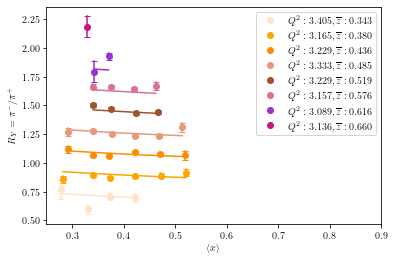

In [15]:
i_color = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
zs_ones_center = df[df['Q2']==4]['z'].unique()
RY_offset = 0
for zi in zs_ones_center:
    #print(xi)
    z_corrs = []
    z_corrs_errs = []
    xbj_corrs = []
    RY_alls = []
    xbj_corr_xbj = []
    #z_err_xbj = []
    Q2_corr_xbj = []
    Q2_err_xbj = []
    xbjs_ones_center = df[df['Q2']==4][df['z']==zi].sort_values('xbj')['xbj'].unique()
    for xi in xbjs_ones_center:
        #print(zi)
        #print(xi,zi)
        RYs = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        for i,row in df[df['Q2']==4][df['z']==zi][df['xbj']==xi].iterrows():
            zi_corr = float(row['z_corr'])
            zi_corr_err = float(row['z_corr_err'])
            xbji_corr = float(row['xbj_corr'])
            xbji_corr_err = float(row['xbj_corr_err'])
            #xbjs_corr.append(xbji_corr)
            #xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = float(row['Q2_corr'])
            Q2i_corr_err = float(row['Q2_corr_err'])
            #z_hadron = float(key_z)
            
        #for key_RunGroup,RunGroup_value in z_value.items():
            
            RunGroup = float(row['RunGroup'])
            RYi=float(row['RY'])+RY_offset
            RYi_error = float(row['error'])
            RYs.append(RYi)
            RYs_error.append(RYi_error)
            zs_corr.append(zi_corr)
            zs_corr_err.append(zi_corr_err)
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
        Q2_corr_z = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        Q2_err_z = Get_weighted_sigma(Q2s_corr,Q2s_corr_err)
        Q2_corr_xbj.append(Q2_corr_z)
        Q2_err_xbj.append(Q2_err_z)
        xbj_corr_z = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_corr_err_z = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        xbj_corr_xbj.append(xbj_corr_z)
        xbj_err_xbj.append(xbj_corr_err_z)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        z_corr_err = Get_weighted_sigma(zs_corr,zs_corr_err)
        RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs,RYs_error)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_corrs.append(xbj_corr)
        z_corrs.append(z_corr)
        z_corrs_errs.append(z_corr_err)
        RY_alls.append(RY)
        plt.plot([xbj_corr_z,xbj_corr_z],[RY+RY_err,RY-RY_err],marker = "_",color = colors_all[i_color])
        Q2_corr = Get_weighted_average(Q2_corr_xbj,Q2_err_xbj)
    z_corr = Get_weighted_average(z_corrs,z_corrs_errs)
    plt.plot(xbj_corr_xbj,RY_alls,"o",label = f"$Q^2:{Q2_corr:.3f},\overline{{z}} :{z_corr:.3f}$",color = colors_all[i_color])#Q2,r'$ x $',str(xbj_corr)[0:5]),color = colors_all[i_color])
    RYmeass = []
    for xbji in xbj_corr_xbj:
        RY_fit = (Y_CSV(math.sqrt(Q2_corr),z_corr,xbji,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],m_Q2.values[4],m_Q2.values[5]))
        RYmeass.append(RY_fit+RY_offset)
    plt.plot(xbj_corr_xbj,RYmeass,color = colors_all[i_color])
    RY_offset = RY_offset+0.2
    #r'$\langle B_{\mathrm{e}} \rangle$'
    
    #plt.title(Q2)
    i_color +=1
plt.xlabel(r'$\langle x \rangle$')
plt.ylabel(r'$R_Y=\pi^-/\pi^+$')
plt.xlim(0.25,0.9)
plt.legend()
#plt.ylim(0,10)
plt.savefig("results/RYxz_x_1st.png")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/2579616463.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xbjs_ones_center = df[df['Q2']==4.75][df['z']==zi].sort_values('xbj')['xbj'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/2579616463.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==4.75][df['z']==zi][df['xbj']==xi].iterrows():


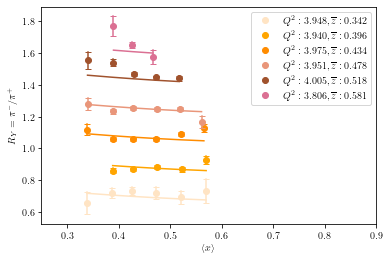

In [16]:
i_color = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
zs_ones_center = df[df['Q2']==4.75]['z'].unique()
RY_offset = 0
for zi in zs_ones_center:
    #print(xi)
    z_corrs = []
    z_corrs_errs = []
    xbj_corrs = []
    RY_alls = []
    xbj_corr_xbj = []
    #z_err_xbj = []
    Q2_corr_xbj = []
    Q2_err_xbj = []
    xbjs_ones_center = df[df['Q2']==4.75][df['z']==zi].sort_values('xbj')['xbj'].unique()
    for xi in xbjs_ones_center:
        #print(zi)
        #print(xi,zi)
        RYs = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        for i,row in df[df['Q2']==4.75][df['z']==zi][df['xbj']==xi].iterrows():
            zi_corr = float(row['z_corr'])
            zi_corr_err = float(row['z_corr_err'])
            xbji_corr = float(row['xbj_corr'])
            xbji_corr_err = float(row['xbj_corr_err'])
            #xbjs_corr.append(xbji_corr)
            #xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = float(row['Q2_corr'])
            Q2i_corr_err = float(row['Q2_corr_err'])
            #z_hadron = float(key_z)
            
        #for key_RunGroup,RunGroup_value in z_value.items():
            
            RunGroup = float(row['RunGroup'])
            RYi=float(row['RY'])+RY_offset
            RYi_error = float(row['error'])
            RYs.append(RYi)
            RYs_error.append(RYi_error)
            zs_corr.append(zi_corr)
            zs_corr_err.append(zi_corr_err)
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
        Q2_corr_z = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        Q2_err_z = Get_weighted_sigma(Q2s_corr,Q2s_corr_err)
        Q2_corr_xbj.append(Q2_corr_z)
        Q2_err_xbj.append(Q2_err_z)
        xbj_corr_z = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_corr_err_z = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        xbj_corr_xbj.append(xbj_corr_z)
        xbj_err_xbj.append(xbj_corr_err_z)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        z_corr_err = Get_weighted_sigma(zs_corr,zs_corr_err)
        RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs,RYs_error)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_corrs.append(xbj_corr)
        z_corrs.append(z_corr)
        z_corrs_errs.append(z_corr_err)
        RY_alls.append(RY)
        plt.plot([xbj_corr_z,xbj_corr_z],[RY+RY_err,RY-RY_err],marker = "_",color = colors_all[i_color])
        Q2_corr = Get_weighted_average(Q2_corr_xbj,Q2_err_xbj)
    z_corr = Get_weighted_average(z_corrs,z_corrs_errs)
    plt.plot(xbj_corr_xbj,RY_alls,"o",label = f"$Q^2:{Q2_corr:.3f},\overline{{z}} :{z_corr:.3f}$",color = colors_all[i_color])#Q2,r'$ x $',str(xbj_corr)[0:5]),color = colors_all[i_color])
    RYmeass = []
    for xbji in xbj_corr_xbj:
        RY_fit = (Y_CSV(math.sqrt(Q2_corr),z_corr,xbji,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],m_Q2.values[4],m_Q2.values[5]))
        RYmeass.append(RY_fit+RY_offset)
    plt.plot(xbj_corr_xbj,RYmeass,color = colors_all[i_color])
    RY_offset = RY_offset+0.2
    #r'$\langle B_{\mathrm{e}} \rangle$'
    
    #plt.title(Q2)
    i_color +=1
plt.xlabel(r'$\langle x \rangle$')
plt.ylabel(r'$R_Y=\pi^-/\pi^+$')
plt.xlim(0.25,0.9)
plt.legend()
#plt.ylim(0,10)
plt.savefig("results/RYxz_x_2nd.png")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/1125976735.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xbjs_ones_center = df[df['Q2']==5.5][df['z']==zi].sort_values('xbj')['xbj'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/1125976735.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==5.5][df['z']==zi][df['xbj']==xi].iterrows():


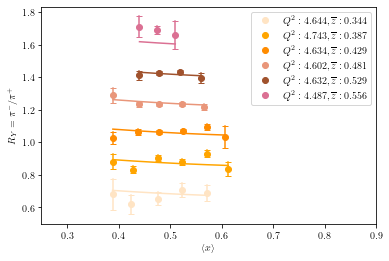

In [17]:
i_color = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
zs_ones_center = df[df['Q2']==5.5]['z'].unique()
RY_offset = 0
for zi in zs_ones_center:
    #print(xi)
    z_corrs = []
    z_corrs_errs = []
    xbj_corrs = []
    RY_alls = []
    xbj_corr_xbj = []
    #z_err_xbj = []
    Q2_corr_xbj = []
    Q2_err_xbj = []
    xbjs_ones_center = df[df['Q2']==5.5][df['z']==zi].sort_values('xbj')['xbj'].unique()
    for xi in xbjs_ones_center:
        #print(zi)
        #print(xi,zi)
        RYs = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        for i,row in df[df['Q2']==5.5][df['z']==zi][df['xbj']==xi].iterrows():
            zi_corr = float(row['z_corr'])
            zi_corr_err = float(row['z_corr_err'])
            xbji_corr = float(row['xbj_corr'])
            xbji_corr_err = float(row['xbj_corr_err'])
            #xbjs_corr.append(xbji_corr)
            #xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = float(row['Q2_corr'])
            Q2i_corr_err = float(row['Q2_corr_err'])
            #z_hadron = float(key_z)
            
        #for key_RunGroup,RunGroup_value in z_value.items():
            
            RunGroup = float(row['RunGroup'])
            RYi=float(row['RY'])+RY_offset
            RYi_error = float(row['error'])
            RYs.append(RYi)
            RYs_error.append(RYi_error)
            zs_corr.append(zi_corr)
            zs_corr_err.append(zi_corr_err)
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
        Q2_corr_z = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        Q2_err_z = Get_weighted_sigma(Q2s_corr,Q2s_corr_err)
        Q2_corr_xbj.append(Q2_corr_z)
        Q2_err_xbj.append(Q2_err_z)
        xbj_corr_z = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_corr_err_z = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        xbj_corr_xbj.append(xbj_corr_z)
        xbj_err_xbj.append(xbj_corr_err_z)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        z_corr_err = Get_weighted_sigma(zs_corr,zs_corr_err)
        RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs,RYs_error)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_corrs.append(xbj_corr)
        z_corrs.append(z_corr)
        z_corrs_errs.append(z_corr_err)
        RY_alls.append(RY)
        plt.plot([xbj_corr_z,xbj_corr_z],[RY+RY_err,RY-RY_err],marker = "_",color = colors_all[i_color])
        Q2_corr = Get_weighted_average(Q2_corr_xbj,Q2_err_xbj)
    z_corr = Get_weighted_average(z_corrs,z_corrs_errs)
    plt.plot(xbj_corr_xbj,RY_alls,"o",label = f"$Q^2:{Q2_corr:.3f},\overline{{z}} :{z_corr:.3f}$",color = colors_all[i_color])#Q2,r'$ x $',str(xbj_corr)[0:5]),color = colors_all[i_color])
    RYmeass = []
    for xbji in xbj_corr_xbj:
        RY_fit = (Y_CSV(math.sqrt(Q2_corr),z_corr,xbji,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],m_Q2.values[4],m_Q2.values[5]))
        RYmeass.append(RY_fit+RY_offset)
    plt.plot(xbj_corr_xbj,RYmeass,color = colors_all[i_color])
    RY_offset = RY_offset+0.2
    #r'$\langle B_{\mathrm{e}} \rangle$'
    
    #plt.title(Q2)
    i_color +=1
plt.xlabel(r'$\langle x \rangle$')
plt.ylabel(r'$R_Y=\pi^-/\pi^+$')
plt.xlim(0.25,0.9)
plt.legend()
#plt.ylim(0,10)
plt.savefig("results/RYxz_x_3rd.png")

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2


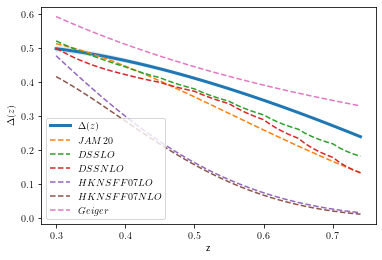

In [18]:
zhad_fit = np.arange(0.3,0.75,0.01)
from iminuit.util import propagate

Q = 2
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_Deltaz = []
DSS_LO = []
DSS_NLO = []
HKNSFF07_LO = []
HKNSFF07_NLO = []
Geiger = []
z_axis = np.arange(0.3,0.75,0.01)
for zi in z_axis:
    dup = JAM20.xfxQ(2,zi,Q)
    dum = JAM20.xfxQ(-2,zi,Q)
    #print(dup,' ',dum)
    JAM20_Deltaz.append(dum/dup)
    DSS_LO.append(fDSS_.fdss(1,-1,0,zi,Q*Q)[0]/fDSS_.fdss(1,1,0,zi,4.75)[0])
    DSS_NLO.append(fDSS_.fdss(1,-1,1,zi,Q*Q)[0]/fDSS_.fdss(1,1,1,zi,4.75)[0])
    ff = np.zeros(11)
    grad = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,1,ff,grad)
    ff_minus = np.zeros(11)
    grad_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,2,ff_minus,grad_minus)
    duplus = zi*ff[6]
    duminus = zi*ff_minus[6]
    HKNSFF07_LO.append(duminus/duplus)
    ff_NLO = np.zeros(11)
    grad_NLO = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,1,ff_NLO,grad_NLO)
    ff_NLO_minus = np.zeros(11)
    grad_NLO_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,2,ff_NLO_minus,grad_NLO_minus)
    duplus_NLO = zi*ff_NLO[6]
    duminus_NLO = zi*ff_NLO_minus[6]
    HKNSFF07_NLO.append(duminus_NLO/duplus_NLO)
    R_D = (1.0-zi)**0.0083583/(1.0+zi)**1.9838
    Geiger.append(R_D)

def Deltaz_param(z_had,params):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return delta_z
Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(zhad_fit,Deltaz_all,lw = 3,label = r"$\Delta(z)$")
Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
plt.fill_between(zhad_fit,Deltaz_all-Deltaz_err_prop_all,Deltaz_all+Deltaz_err_prop_all,alpha = 0.15)

plt.plot(z_axis,np.asarray(JAM20_Deltaz),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.plot(z_axis,np.asarray(DSS_LO),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,np.asarray(DSS_NLO),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,np.asarray(HKNSFF07_LO),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,np.asarray(HKNSFF07_NLO),linestyle='dashed',label = r'$HKNSFF07 NLO$')
plt.plot(z_axis,np.asarray(Geiger),linestyle = 'dashed',label = r'$Geiger$')
plt.legend()




plt.legend()
plt.savefig("results/Dz_err_new_Y.pdf")

#print(D_z_all[1])

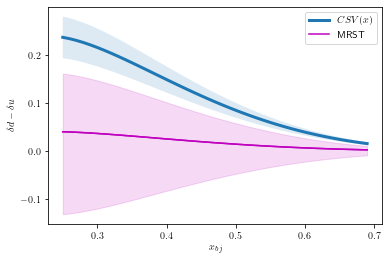

In [19]:
xbj_fit = np.arange(0.25,0.7,0.01)
def CSVx_param(xbj,params):
    k = params[2]
    a = params[3]
    #a = -0.5
    b = params[4]
    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
    dux = k*(1-xbj)**a*xbj**b*(xbj-c)
    a_CSV = params[5]
    CSVx = -(1+a_CSV)*dux
    #c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    #return dux
    return CSVx
CSVx_all, CSVcov_all = propagate(lambda p: CSVx_param(xbj_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")
CSVx_err_prop_all = np.diag(CSVcov_all)**0.5
plt.fill_between(xbj_fit,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)



def delta_udv(parameter):
    x = np.arange(0.25,0.7,0.01)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)

x_axis = np.arange(0.25,0.7,0.01)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')

#plt.xlim(0.25,0.7)
#plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")

plt.savefig("results/CSV_err_new_Y.pdf")

['$\\chi^2$ / $n_\\mathrm{dof}$ = 805.4 / 384', 'alpha = $0.283 \\pm 0.016$', 'beta = $1.000 \\pm 0.003$', 'k = $-1.877 \\pm 0.343$', 'a = $4.000 \\pm 0.040$', 'b = $-0.500 \\pm -0.005$', 'a_CSV = $0.250 \\pm 0.003$']


(array([24., 38., 34., 23., 19., 23., 19., 17., 15., 13., 12.,  7.,  7.,
         8.,  5., 11.,  8., 10.,  4.,  6.]),
 array([0.0208573 , 0.0247733 , 0.02868929, 0.03260528, 0.03652128,
        0.04043727, 0.04435327, 0.04826927, 0.05218526, 0.05610126,
        0.06001725, 0.06393324, 0.06784924, 0.07176523, 0.07568123,
        0.07959723, 0.08351322, 0.08742922, 0.09134521, 0.09526121,
        0.0991772 ]),
 <BarContainer object of 20 artists>)

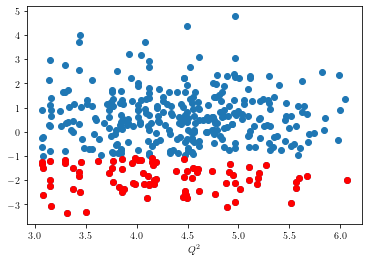

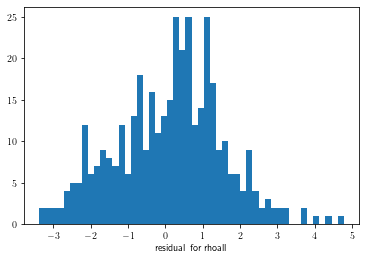

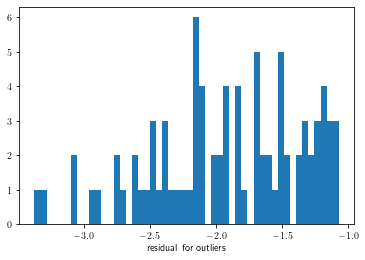

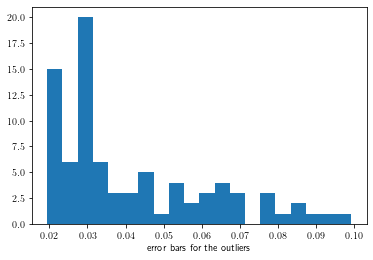

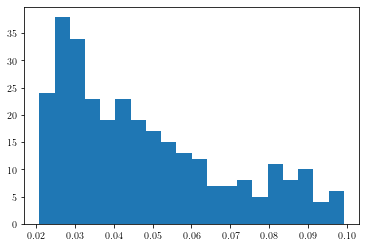

In [20]:
print(fit_info)
#plt.plot(dfrhorhoallout['Q2_corr'],dfrhorhoallout['Residual_a_CSV'],'bo')
#plt.hist(dfrhorhoallout['Residual_a_CSV'],50)
plt.scatter(dfrhoallout['Q2_corr'],dfrhoallout['Residual_a_CSV'])
plt.errorbar(dfrhoallout[dfrhoallout['Residual_a_CSV']<-1]['Q2_corr'],dfrhoallout[dfrhoallout['Residual_a_CSV']<-1]['Residual_a_CSV'],dfrhoallout[dfrhoallout['Residual_a_CSV']<-1]['error'],fmt = 'o',color = 'r')
plt.xlabel(r'$Q^2$')
#plt.legend(title="\n".join(fit_info))
#plt.savefig("results/Residual_7assumption_rhoall_Q2.pdf")
#print(len(dfrhoallout['Residual_a_CSV']))
fig,ax = plt.subplots() 
plt.hist(dfrhoallout['Residual_a_CSV'],50)
plt.xlabel('residual for rhoall')
#plt.legend(title="\n".join(fit_info))
#plt.savefig("results/Residual_7assumption_rhoall.pdf")
fig,ax = plt.subplots() 
plt.hist(dfrhoallout[dfrhoallout['Residual_a_CSV']<-1]['Residual_a_CSV'],50)
plt.xlabel('residual for outliers')
fig,ax = plt.subplots() 
plt.hist(dfrhoallout[dfrhoallout['Residual_a_CSV']<-1]['error'],20)
plt.xlabel('error bars for the outliers')
fig,ax = plt.subplots() 
plt.hist(dfrhoallout[dfrhoallout['Residual_a_CSV']>-1]['error'],20)
#plt.xlabel('error bars for good Residual a_CSV')

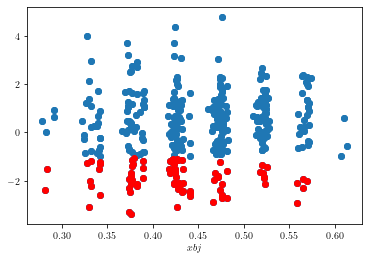

In [21]:
plt.scatter(dfrhoallout['xbj_corr'],dfrhoallout['Residual_a_CSV'])
plt.errorbar(dfrhoallout['xbj_corr'],dfrhoallout['Residual_a_CSV'],dfrhoallout['error'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_a_CSV']<-1]['xbj_corr'],dfrhoallout[dfrhoallout['Residual_a_CSV']<-1]['Residual_a_CSV'],dfrhoallout[dfrhoallout['Residual_a_CSV']<-1]['error'],fmt = 'o',color = 'r')
plt.xlabel(r'$xbj$')
plt.savefig("results/Residual_7assumption_rhoall_xbj.pdf")

In [22]:
def Get_Delta_z(Q,z_had):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return delta_z
def du_from_yield_ratio(Q,x,z,yield_ratio,yield_ratio_err):
    Delta_z = Get_Delta_z(Q,z)
    u = JAM20_PDF.xfxQ(2,xbj,Q)
    ub = JAM20_PDF.xfxQ(-2,xbj,Q)
    d = JAM20_PDF.xfxQ(1,xbj,Q)
    db = JAM20_PDF.xfxQ(-1,xbj,Q)
    T = (ub+db)/(u+d)
    strange = JAM20_PDF.xfxQ(3,xbj,Q)
    sb = JAM20_PDF.xfxQ(-3,xbj,Q)
    S = 2*(strange+sb)/(u+d)
    
    a = params[4]
    Y = yield_ratio
    #du_ratio = du/(u+d)
    A = 4*Delta_z+T*Delta_z+S*Delta_z+1+4*T
    B = (4*T*Delta_z+Delta_z+S*Delta_z+4+T)
    C = 4*a-Delta_z
    D = (4*a*Delta_z-1)
    du_ratio = (A-B*Y)/(C*Y-D)
    #du_ratio = (4*Delta_z+T*Delta_z+S*Delta_z+1-Y*(4*T*Delta_z+Delta_z+S*Delta_z)-Y*(4+T))/((4*a-Delta_z)*Y-(4*a*Delta_z-1)) 
    du = du_ratio*(u+d)
    sig_du = B/C*(A*C/B-D)*C*yield_ratio_err/(C*yield_ratio-D)**2
    sig_du = sig_du*(u+d)
    return du,sig_du
def CSV_from_yield_ratio(Q,x,z,yield_ratio,yield_ratio_err):
    Delta_z = Get_Delta_z(Q,z)
    u = JAM20_PDF.xfxQ(2,xbj,Q)
    ub = JAM20_PDF.xfxQ(-2,xbj,Q)
    d = JAM20_PDF.xfxQ(1,xbj,Q)
    db = JAM20_PDF.xfxQ(-1,xbj,Q)
    T = (ub+db)/(u+d)
    strange = JAM20_PDF.xfxQ(3,xbj,Q)
    sb = JAM20_PDF.xfxQ(-3,xbj,Q)
    S = 2*(strange+sb)/(u+d)

    a = params[5]
    Y = yield_ratio
    #du_ratio = du/(u+d)
    A = 4*Delta_z+T*Delta_z+S*Delta_z+1+4*T
    B = (4*T*Delta_z+Delta_z+S*Delta_z+4+T)
    C = 4*a-Delta_z
    D = (4*a*Delta_z-1)
    du_ratio = (A-B*Y)/(C*Y-D)
    #du_ratio = (4*Delta_z+T*Delta_z+S*Delta_z+1-Y*(4*T*Delta_z+Delta_z+S*Delta_z)-Y*(4+T))/((4*a-Delta_z)*Y-(4*a*Delta_z-1)) 
    du = du_ratio*(u+d)
    CSV = -(1+a)*du
    sig_du = B/C*(A*C/B-D)*C*yield_ratio_err/(C*yield_ratio-D)**2
    sig_du = sig_du*(u+d)
    sig_CSV = -(1+a)*sig_du
    return CSV,sig_CSV

In [23]:
xbj_ones_corr = []
xbj_ones_err = []
CSV_ones = []
CSV_ones_err = []
xbj_ones_plot = []
z_ones_plot = []
Q2s_ones_plot = []
CSV_ones_plot = []
CSV_ones_err_plot = []
RD_ones_plot = []
xbj_twos_corr = []
xbj_twos_err = []
CSV_twos = []
CSV_twos_err = []
xbj_twos_plot = []
z_twos_plot = []
Q2s_twos_plot = []
CSV_twos_plot = []
CSV_twos_err_plot = []
RD_twos_plot = []
xbj_threes_corr = []
xbj_threes_err = []
CSV_threes = []
CSV_threes_err = []
xbj_threes_plot = []
z_threes_plot = []
Q2s_threes_plot = []
CSV_threes_plot = []
CSV_threes_err_plot = []
RD_threes_plot = []

In [24]:
print(params)

<ValueView alpha=0.28319051431746367 beta=1.0000000000061917 k=-1.8771383627557117 a=4.0 b=-0.5 a_CSV=0.25>


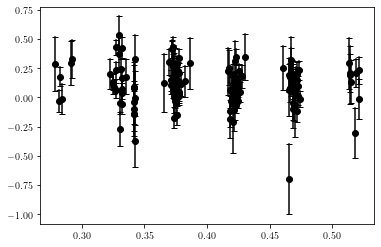

In [25]:
zs_ones_corr = []
for i,row in df[df['Q2']==4].iterrows():
    zi_corr = float(row['z_corr'])
    zs_ones_corr.append(zi_corr)
    #zi_corr_err = float(row['z_corr_err'])
    #zs_corr_err.append(zi_corr_err)
    xbji_corr = float(row['xbj_corr'])
    #xbji_corr_err = float(row['xbj_corr_err'])
    #xbjs_corr.append(xbji_corr)
    #xbjs_corr_err.append(xbji_corr_err)
    Q2i_corr = float(row['Q2_corr'])
    #Q2i_corr_err = float(row['Q2_corr_err'])
    #Q2s_corr.append(Q2i_corr)
    #Q2s_corr_err.append(Q2i_corr_err)
    RYi=float(row['RY'])
    RYi_error = float(row['error'])
    if Q2i_corr<3:
        print(Q2i_corr)
    Qi_corr = math.sqrt(Q2i_corr)
    CSVxzi = CSV_from_yield_ratio(Qi_corr,xbji_corr,zi_corr,RYi,RYi_error)[0]
    CSVxzi_err = CSV_from_yield_ratio(Qi_corr,xbji_corr,zi_corr,RYi,RYi_error)[1]
    CSV_ones.append(CSVxzi)
    CSV_ones_err.append(CSVxzi_err)
    xbj_ones_corr.append(xbji_corr)

    #print(row['xbj'])
plt.scatter(xbj_ones_corr,CSV_ones,color = 'k')
for i in range(len(CSV_ones)):
    plt.plot([xbj_ones_corr[i],xbj_ones_corr[i]],[CSV_ones[i]-CSV_ones_err[i],CSV_ones[i]+CSV_ones_err[i]],marker = "_",color = "k")


#plt.plot(xbj_ones_corr,np.asarray(CSV_ones)-np.asarray(CSV_ones_err),np.asarray(CSV_ones)+np.asarray(CSV_ones_err))

0.275
0.325
0.375
0.425
0.475
0.525


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/3540780266.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==4][df['xbj']==xi].iterrows():


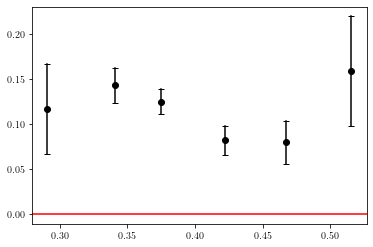

In [26]:
xbj_ones_center = df[df['Q2']==4]['xbj'].unique()
for xi in xbj_ones_center:
    print(xi)
    CSVxi_ones_plot = []
    CSVxi_ones_err_plot = []
    xbjxi_ones_corr_plot = []
    xbjxi_ones_err_plot = []
    zxi_ones_corr_plot = []
    zxi_ones_err_plot = []
    Q2sxi_ones_corr_plot = []
    Q2sxi_ones_err_plot = []
    
    for i,row in df[df['Q2']==4][df['xbj']==xi].iterrows():
        
        zi_corr = float(row['z_corr'])
        zi_corr_err = float(row['z_corr_err'])
        xbji_corr = float(row['xbj_corr'])
        xbji_corr_err = float(row['xbj_corr_err'])
        #xbjs_corr.append(xbji_corr)
        #xbjs_corr_err.append(xbji_corr_err)
        Q2i_corr = float(row['Q2_corr'])
        Q2i_corr_err = float(row['Q2_corr_err'])
        #Q2s_corr.append(Q2i_corr)
        #Q2s_corr_err.append(Q2i_corr_err)
        if Q2i_corr<3:
            print(Q2i_corr)
        RYi=float(row['RY'])
        RYi_error = float(row['error']) 
        CSVxzi = CSV_from_yield_ratio(Qi_corr,xbji_corr,zi_corr,RYi,RYi_error)[0]
        CSVxzi_err = CSV_from_yield_ratio(Qi_corr,xbji_corr,zi_corr,RYi,RYi_error)[1]
        CSVxi_ones_plot.append(CSVxzi)
        CSVxi_ones_err_plot.append(CSVxzi_err)
        xbjxi_ones_corr_plot.append(xbji_corr)
        xbjxi_ones_err_plot.append(xbji_corr_err)
        zxi_ones_corr_plot.append(zi_corr)
        zxi_ones_err_plot.append(zi_corr_err)
        Q2sxi_ones_corr_plot.append(Q2i_corr)
        Q2sxi_ones_err_plot.append(Q2i_corr_err)
    CSVi_ones_plot = Get_weighted_average(CSVxi_ones_plot,CSVxi_ones_err_plot)
    CSVi_ones_err_plot = Get_weighted_sigma(CSVxi_ones_plot,CSVxi_ones_err_plot)
    xbji_ones_plot = Get_weighted_average(xbjxi_ones_corr_plot,xbjxi_ones_err_plot)
    zi_ones_plot = Get_weighted_average(zxi_ones_corr_plot,zxi_ones_err_plot)
    Q2si_ones_plot = Get_weighted_average(Q2sxi_ones_corr_plot,Q2sxi_ones_err_plot)
    #xbji_ones_err_plot = Get_weighted_sigma(xbjxi_ones_plot,xbjxi_ones_err_plot)
    CSV_ones_plot.append(CSVi_ones_plot)
    CSV_ones_err_plot.append(CSVi_ones_err_plot)
    xbj_ones_plot.append(xbji_ones_plot)
    z_ones_plot.append(zi_ones_plot)
    Q2s_ones_plot.append(Q2si_ones_plot)
   

plt.scatter(xbj_ones_plot,CSV_ones_plot,color = 'k')
for i in range(len(CSV_ones_plot)):
    plt.plot([xbj_ones_plot[i],xbj_ones_plot[i]],[CSV_ones_plot[i]-CSV_ones_err_plot[i],CSV_ones_plot[i]+CSV_ones_err_plot[i]],marker = "_",color = "k")
plt.axhline(y=0, color='r', linestyle='-')



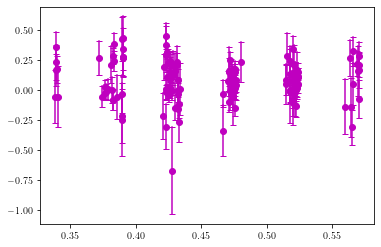

In [27]:
zs_twos_corr = []
for i,row in df[df['Q2']==4.75].iterrows():
    zi_corr = float(row['z_corr'])
    zs_twos_corr.append(zi_corr)
    #zi_corr_err = float(row['z_corr_err'])
    #zs_corr_err.append(zi_corr_err)
    xbji_corr = float(row['xbj_corr'])
    #xbji_corr_err = float(row['xbj_corr_err'])
    #xbjs_corr.append(xbji_corr)
    #xbjs_corr_err.append(xbji_corr_err)
    Q2i_corr = float(row['Q2_corr'])
    #Q2i_corr_err = float(row['Q2_corr_err'])
    #Q2s_corr.append(Q2i_corr)
    #Q2s_corr_err.append(Q2i_corr_err)
    RYi=float(row['RY'])
    RYi_error = float(row['error'])
    if Q2i_corr<3:
        print(Q2i_corr)
    Qi_corr = math.sqrt(Q2i_corr)
    CSVxzi = CSV_from_yield_ratio(Qi_corr,xbji_corr,zi_corr,RYi,RYi_error)[0]
    CSVxzi_err = CSV_from_yield_ratio(Qi_corr,xbji_corr,zi_corr,RYi,RYi_error)[1]
    CSV_twos.append(CSVxzi)
    CSV_twos_err.append(CSVxzi_err)
    xbj_twos_corr.append(xbji_corr)

    #print(row['xbj'])
plt.scatter(xbj_twos_corr,CSV_twos,color = 'm')
for i in range(len(CSV_twos)):
    plt.plot([xbj_twos_corr[i],xbj_twos_corr[i]],[CSV_twos[i]-CSV_twos_err[i],CSV_twos[i]+CSV_twos_err[i]],marker = "_",color = "m")


#plt.plot(xbj_twos_corr,np.asarray(CSV_twos)-np.asarray(CSV_twos_err),np.asarray(CSV_twos)+np.asarray(CSV_twos_err))

0.325
0.375
0.425
0.475
0.525
0.575


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/2433309084.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==4.75][df['xbj']==xi].iterrows():


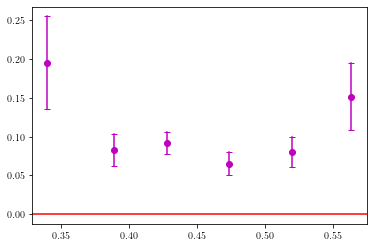

In [28]:
xbj_twos_center = df[df['Q2']==4.75]['xbj'].unique()
for xi in xbj_twos_center:
    print(xi)
    CSVxi_twos_plot = []
    CSVxi_twos_err_plot = []
    xbjxi_twos_corr_plot = []
    xbjxi_twos_err_plot = []
    zxi_twos_corr_plot = []
    zxi_twos_err_plot = []
    Q2sxi_twos_corr_plot = []
    Q2sxi_twos_err_plot = []
    
    for i,row in df[df['Q2']==4.75][df['xbj']==xi].iterrows():
        
        zi_corr = float(row['z_corr'])
        zi_corr_err = float(row['z_corr_err'])
        xbji_corr = float(row['xbj_corr'])
        xbji_corr_err = float(row['xbj_corr_err'])
        #xbjs_corr.append(xbji_corr)
        #xbjs_corr_err.append(xbji_corr_err)
        Q2i_corr = float(row['Q2_corr'])
        Q2i_corr_err = float(row['Q2_corr_err'])
        #Q2s_corr.append(Q2i_corr)
        #Q2s_corr_err.append(Q2i_corr_err)
        if Q2i_corr<3:
            print(Q2i_corr)
        RYi=float(row['RY'])
        RYi_error = float(row['error'])
        CSVxzi = CSV_from_yield_ratio(Qi_corr,xbji_corr,zi_corr,RYi,RYi_error)[0]
        CSVxzi_err = CSV_from_yield_ratio(Qi_corr,xbji_corr,zi_corr,RYi,RYi_error)[1]
        CSVxi_twos_plot.append(CSVxzi)
        CSVxi_twos_err_plot.append(CSVxzi_err)
        xbjxi_twos_corr_plot.append(xbji_corr)
        xbjxi_twos_err_plot.append(xbji_corr_err)
        zxi_twos_corr_plot.append(zi_corr)
        zxi_twos_err_plot.append(zi_corr_err)
        Q2sxi_twos_corr_plot.append(Q2i_corr)
        Q2sxi_twos_err_plot.append(Q2i_corr_err)
    CSVi_twos_plot = Get_weighted_average(CSVxi_twos_plot,CSVxi_twos_err_plot)
    CSVi_twos_err_plot = Get_weighted_sigma(CSVxi_twos_plot,CSVxi_twos_err_plot)
    xbji_twos_plot = Get_weighted_average(xbjxi_twos_corr_plot,xbjxi_twos_err_plot)
    zi_twos_plot = Get_weighted_average(zxi_twos_corr_plot,zxi_twos_err_plot)
    Q2si_twos_plot = Get_weighted_average(Q2sxi_twos_corr_plot,Q2sxi_twos_err_plot)
    #xbji_twos_err_plot = Get_weighted_sigma(xbjxi_twos_plot,xbjxi_twos_err_plot)
    CSV_twos_plot.append(CSVi_twos_plot)
    CSV_twos_err_plot.append(CSVi_twos_err_plot)
    xbj_twos_plot.append(xbji_twos_plot)
    z_twos_plot.append(zi_twos_plot)
    Q2s_twos_plot.append(Q2si_twos_plot)
   

plt.scatter(xbj_twos_plot,CSV_twos_plot,color = 'm')
for i in range(len(CSV_twos_plot)):
    plt.plot([xbj_twos_plot[i],xbj_twos_plot[i]],[CSV_twos_plot[i]-CSV_twos_err_plot[i],CSV_twos_plot[i]+CSV_twos_err_plot[i]],marker = "_",color = "m")
plt.axhline(y=0, color='r', linestyle='-')



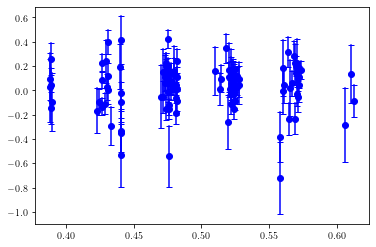

In [29]:
zs_threes_corr = []
for i,row in df[df['Q2']==5.5].iterrows():
    zi_corr = float(row['z_corr'])
    zs_threes_corr.append(zi_corr)
    #zi_corr_err = float(row['z_corr_err'])
    #zs_corr_err.append(zi_corr_err)
    xbji_corr = float(row['xbj_corr'])
    #xbji_corr_err = float(row['xbj_corr_err'])
    #xbjs_corr.append(xbji_corr)
    #xbjs_corr_err.append(xbji_corr_err)
    Q2i_corr = float(row['Q2_corr'])
    #Q2i_corr_err = float(row['Q2_corr_err'])
    #Q2s_corr.append(Q2i_corr)
    #Q2s_corr_err.append(Q2i_corr_err)
    RYi=float(row['RY'])
    RYi_error = float(row['error'])
    if Q2i_corr<3:
        print(Q2i_corr)
    Qi_corr = math.sqrt(Q2i_corr)
    CSVxzi = CSV_from_yield_ratio(Qi_corr,xbji_corr,zi_corr,RYi,RYi_error)[0]
    CSVxzi_err = CSV_from_yield_ratio(Qi_corr,xbji_corr,zi_corr,RYi,RYi_error)[1]
    CSV_threes.append(CSVxzi)
    CSV_threes_err.append(CSVxzi_err)
    xbj_threes_corr.append(xbji_corr)

    #print(row['xbj'])
plt.scatter(xbj_threes_corr,CSV_threes,color = 'b')
for i in range(len(CSV_threes)):
    plt.plot([xbj_threes_corr[i],xbj_threes_corr[i]],[CSV_threes[i]-CSV_threes_err[i],CSV_threes[i]+CSV_threes_err[i]],marker = "_",color = "b")


#plt.plot(xbj_threes_corr,np.asarray(CSV_threes)-np.asarray(CSV_threes_err),np.asarray(CSV_threes)+np.asarray(CSV_threes_err))

0.375
0.425


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_76356/3702207166.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==5.5][df['xbj']==xi].iterrows():


0.475
0.525
0.575
0.625


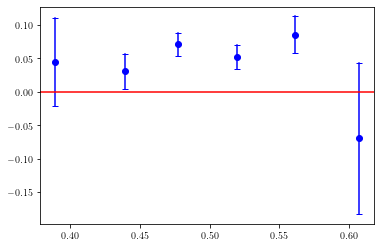

In [30]:
xbj_threes_center = df[df['Q2']==5.5]['xbj'].unique()
for xi in xbj_threes_center:
    print(xi)
    CSVxi_threes_plot = []
    CSVxi_threes_err_plot = []
    xbjxi_threes_corr_plot = []
    xbjxi_threes_err_plot = []
    zxi_threes_corr_plot = []
    zxi_threes_err_plot = []
    Q2sxi_threes_corr_plot = []
    Q2sxi_threes_err_plot = []
    
    for i,row in df[df['Q2']==5.5][df['xbj']==xi].iterrows():
        
        zi_corr = float(row['z_corr'])
        zi_corr_err = float(row['z_corr_err'])
        xbji_corr = float(row['xbj_corr'])
        xbji_corr_err = float(row['xbj_corr_err'])
        #xbjs_corr.append(xbji_corr)
        #xbjs_corr_err.append(xbji_corr_err)
        Q2i_corr = float(row['Q2_corr'])
        Q2i_corr_err = float(row['Q2_corr_err'])
        #Q2s_corr.append(Q2i_corr)
        #Q2s_corr_err.append(Q2i_corr_err)
        if Q2i_corr<3:
            print(Q2i_corr)
        RYi=float(row['RY'])
        RYi_error = float(row['error'])
        CSVxzi = CSV_from_yield_ratio(Qi_corr,xbji_corr,zi_corr,RYi,RYi_error)[0]
        CSVxzi_err = CSV_from_yield_ratio(Qi_corr,xbji_corr,zi_corr,RYi,RYi_error)[1]
        CSVxi_threes_plot.append(CSVxzi)
        CSVxi_threes_err_plot.append(CSVxzi_err)
        xbjxi_threes_corr_plot.append(xbji_corr)
        xbjxi_threes_err_plot.append(xbji_corr_err)
        zxi_threes_corr_plot.append(zi_corr)
        zxi_threes_err_plot.append(zi_corr_err)
        Q2sxi_threes_corr_plot.append(Q2i_corr)
        Q2sxi_threes_err_plot.append(Q2i_corr_err)
    CSVi_threes_plot = Get_weighted_average(CSVxi_threes_plot,CSVxi_threes_err_plot)
    CSVi_threes_err_plot = Get_weighted_sigma(CSVxi_threes_plot,CSVxi_threes_err_plot)
    xbji_threes_plot = Get_weighted_average(xbjxi_threes_corr_plot,xbjxi_threes_err_plot)
    zi_threes_plot = Get_weighted_average(zxi_threes_corr_plot,zxi_threes_err_plot)
    Q2si_threes_plot = Get_weighted_average(Q2sxi_threes_corr_plot,Q2sxi_threes_err_plot)
    #xbji_threes_err_plot = Get_weighted_sigma(xbjxi_threes_plot,xbjxi_threes_err_plot)
    CSV_threes_plot.append(CSVi_threes_plot)
    CSV_threes_err_plot.append(CSVi_threes_err_plot)
    xbj_threes_plot.append(xbji_threes_plot)
    z_threes_plot.append(zi_threes_plot)
    Q2s_threes_plot.append(Q2si_threes_plot)
   

plt.scatter(xbj_threes_plot,CSV_threes_plot,color = 'b')
for i in range(len(CSV_threes_plot)):
    plt.plot([xbj_threes_plot[i],xbj_threes_plot[i]],[CSV_threes_plot[i]-CSV_threes_err_plot[i],CSV_threes_plot[i]+CSV_threes_err_plot[i]],marker = "_",color = "b")
plt.axhline(y=0, color='r', linestyle='-')



Text(0, 0.5, '$\\delta d - \\delta u$')

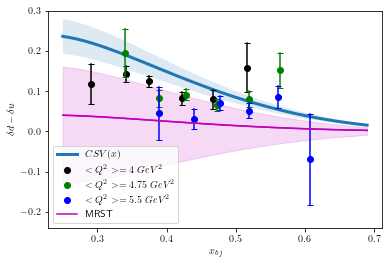

In [31]:
plt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")

plt.fill_between(xbj_fit,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)

for i in range(len(CSV_ones_plot)):
    plt.plot([xbj_ones_plot[i],xbj_ones_plot[i]],[CSV_ones_plot[i]-CSV_ones_err_plot[i],CSV_ones_plot[i]+CSV_ones_err_plot[i]],marker = "_",color = "k")
plt.plot(xbj_ones_plot,CSV_ones_plot,"ko",label = r"$<Q^2> = 4\ GeV^2$")
for i in range(len(CSV_twos_plot)):
    plt.plot([xbj_twos_plot[i],xbj_twos_plot[i]],[CSV_twos_plot[i]-CSV_twos_err_plot[i],CSV_twos_plot[i]+CSV_twos_err_plot[i]],marker = "_",color = "g")
plt.plot(xbj_twos_plot,CSV_twos_plot,"go",label = r"$<Q^2> = 4.75\ GeV^2$")
for i in range(len(CSV_threes_plot)):
    plt.plot([xbj_threes_plot[i],xbj_threes_plot[i]],[CSV_threes_plot[i]-CSV_threes_err_plot[i],CSV_threes_plot[i]+CSV_threes_err_plot[i]],marker = "_",color = "b")
plt.plot(xbj_threes_plot,CSV_threes_plot,"bo",label = r"$<Q^2> = 5.5\ GeV^2$")




plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')

plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')

#plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")

